<a href="https://colab.research.google.com/github/stephintoto/Accident-Prediction/blob/main/Model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/modified_final_data.csv')

In [ ]:
df.head()

,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Traffic Control,Accussed Vehicle,Victim Vehicle,Cluster,Cluster_Latitude,Cluster_Longitude,Cluster_Place_Name,Datetime,Hour,Time Range
0,KOLLAM CITY,Eravipuram,5653/2023,2023-01-06,2023-09-27,17:33:33,00:00:00,"279,338",Grevious Injury,0,...,Uncontrolled,Car,Lorry,2109,8.865654,76.607678,"Polayathaodu, Kollam, Kerala, 691001, India",2023-09-27 00:00:00,0,0-3
1,ERNAKULAM CITY,Kalamassery,6992/2023,2023-01-20,2023-01-19,18:42:00,00:15:00,"279,338",Grevious Injury,0,...,Police controlled,Car,Lorry,2423,10.029299,76.305734,"Skyline Road, Sahrudaya Nagar, Edapally, Ernak...",2023-01-19 00:15:00,0,0-3
2,THRISSUR RURAL,Irinjalakkuda,7869/2023,2023-01-24,2023-01-10,16:43:00,01:00:00,"279,338",Grevious Injury,0,...,Uncontrolled,Mini Lorry,Motor Cycle,2311,10.345686,76.216873,"Daivamakkal Prarthanalayam, Daivamakkal Road, ...",2023-01-10 01:00:00,1,0-3
3,PALAKKAD,Mannarkkad,8665/2022,2023-01-06,2023-01-06,17:00:00,01:30:00,"279,337",Minor Injury,0,...,Uncontrolled,Car,Scooter,1237,10.985304,76.483019,"Palakkad-Malappuram-Calicut Road, Kottiyode, M...",2023-01-06 01:30:00,1,0-3
4,ALAPPUZHA,Chengannur,6092/2023,2023-01-21,2023-01-16,16:30:00,01:15:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Car,2504,9.282013,76.654424,"Karakkad, Chengannur, Alappuzha, Kerala, 68950...",2023-01-16 01:15:00,1,0-3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            50000 non-null  object 
 1   PS Name             50000 non-null  object 
 2   FIR No              50000 non-null  object 
 3   Date Report         50000 non-null  object 
 4   Date Accident       50000 non-null  object 
 5   Time Report         50000 non-null  object 
 6   Time Accident       50000 non-null  object 
 7   Sections            50000 non-null  object 
 8   Accident type       50000 non-null  object 
 9   Death               50000 non-null  int64  
 10  Grievous            50000 non-null  int64  
 11  Minor               50000 non-null  int64  
 12  Pedestrian          50000 non-null  int64  
 13  Cyclist             50000 non-null  int64  
 14  Latitude            50000 non-null  float64
 15  Longitude           50000 non-null  float64
 16  Plac

In [ ]:
df.shape

(50000, 38)

In [ ]:
df.isna().sum()

,0
District,0
PS Name,0
FIR No,0
Date Report,0
Date Accident,0
Time Report,0
Time Accident,0
Sections,0
Accident type,0
Death,0


In [ ]:

df['T -Junction'] = df['T -Junction'].fillna('Unknown')
print(df['T -Junction'].isnull().sum())


0


In [ ]:

df['Date Accident'] = df['Date Accident'].astype(str)
df['Time Accident'] = df['Time Accident'].astype(str)


df['Datetime'] = pd.to_datetime(df['Date Accident'] + ' ' + df['Time Accident'], errors='coerce')


print(df[['Date Accident', 'Time Accident', 'Datetime']].head())


  Date Accident Time Accident            Datetime
0    2023-09-27      00:00:00 2023-09-27 00:00:00
1    2023-01-19      00:15:00 2023-01-19 00:15:00
2    2023-01-10      01:00:00 2023-01-10 01:00:00
3    2023-01-06      01:30:00 2023-01-06 01:30:00
4    2023-01-16      01:15:00 2023-01-16 01:15:00


In [ ]:
df['Hour'] = df['Datetime'].dt.hour

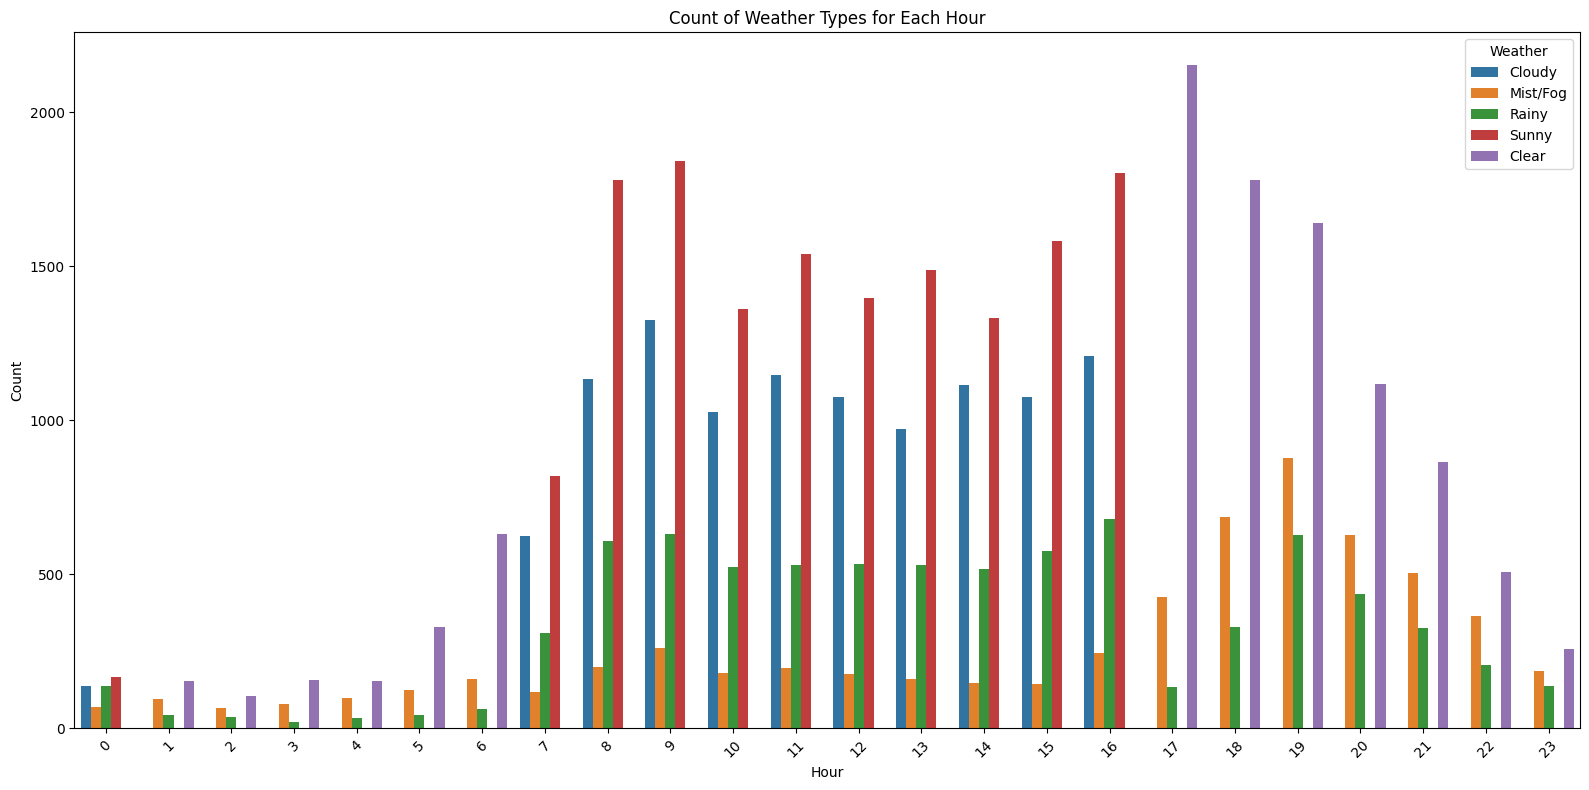

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Hour' and 'Weather' and count the occurrences
weather_counts = df.groupby(['Hour', 'Weather']).size().reset_index(name='Count')

# Plot the bar graph
plt.figure(figsize=(16, 8))
sns.barplot(data=weather_counts, x='Hour', y='Count', hue='Weather', palette="tab10")
plt.title("Count of Weather Types for Each Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Weather", loc="upper right")
plt.tight_layout()
plt.show()


<ipython-input-11-d9309e243ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather', palette='viridis', order=df['Weather'].value_counts().index)


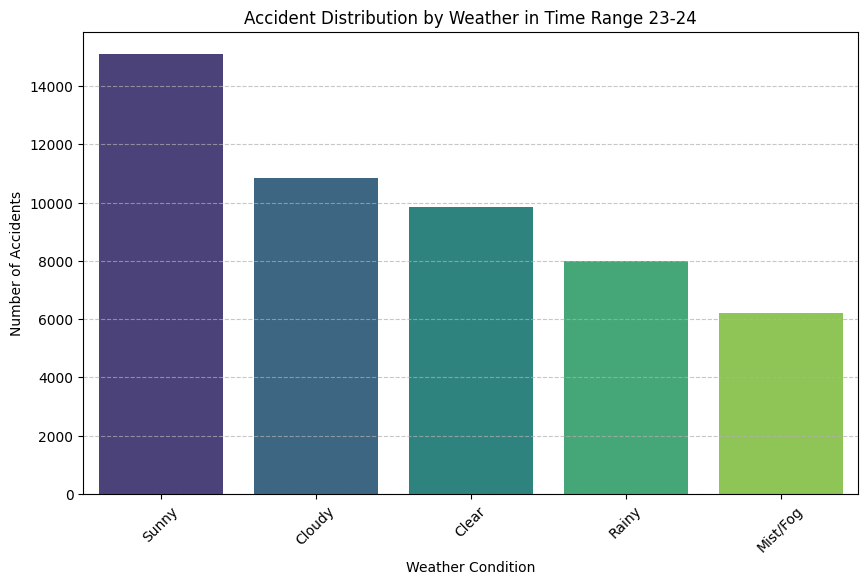

In [ ]:
# Create a bar plot for weather conditions in the 23-24 time range
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather', palette='viridis', order=df['Weather'].value_counts().index)
plt.title("Accident Distribution by Weather in Time Range 23-24")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(df['Weather'].value_counts())

Weather
Sunny       15110
Cloudy      10843
Clear        9844
Rainy        8007
Mist/Fog     6196
Name: count, dtype: int64


In [ ]:

# Assuming 'Hour' column contains the hour values (from 0 to 23)

df['Time Range'] = df['Hour'].apply(lambda x: f"{(x // 3) * 3}-{(x // 3 + 1) * 3 if (x // 3 + 1) * 3 < 24 else 24}")

# Optionally, you can sort the time range values for better readability
df['Time Range'] = pd.Categorical(df['Time Range'], categories=[f"{i}-{i+3}" if i+3 < 24 else f"{i}-{24}" for i in range(0, 24, 3)], ordered=True)

df = df.sort_values('Time Range')


In [ ]:
# prompt: print theunique values in time range

print(df['Time Range'].unique())

['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
Categories (8, object): ['0-3' < '3-6' < '6-9' < '9-12' < '12-15' < '15-18' < '18-21' < '21-24']


In [ ]:
df.head(10)

,District,PS Name,FIR No,Date Report,Date Accident,Time Report,Time Accident,Sections,Accident type,Death,...,Traffic Control,Accussed Vehicle,Victim Vehicle,Cluster,Cluster_Latitude,Cluster_Longitude,Cluster_Place_Name,Datetime,Hour,Time Range
0,KOLLAM CITY,Eravipuram,5653/2023,2023-01-06,2023-09-27,17:33:33,00:00:00,"279,338",Grevious Injury,0,...,Uncontrolled,Car,Lorry,2109,8.865654,76.607678,"Polayathaodu, Kollam, Kerala, 691001, India",2023-09-27 00:00:00,0,0-3
667,KOZHIKODE RURAL,Kakkur,8895/2023,2023-01-26,2023-01-22,17:20:00,01:20:00,MO(Death),Fatal,1,...,Uncontrolled,Scooter,Car,1039,11.346452,75.809256,"7/6, Chelannur, Kozhikode, Kerala, 673616, India",2023-01-22 01:20:00,1,0-3
668,ERNAKULAM RURAL,Piravom,8164/2022,2023-01-02,2023-01-01,15:30:00,01:45:00,"279,338",Grevious Injury,0,...,Police controlled,Car,Motor Cycle,1443,9.879175,76.490934,"Piravom, Muvattupuzha, Ernakulam, Kerala, 6866...",2023-01-01 01:45:00,1,0-3
669,THIRUVANANTHAPURAM RURAL,Aruvikkara,6367/2022,2023-01-01,2023-12-31,15:00:00,00:01:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Motor Cycle,Private Bus,1951,8.575169,77.015450,"Aruvikkara, Nedumangad, Thiruvananthapuram, Ke...",2023-12-31 00:01:00,0,0-3
670,THRISSUR CITY,Ollur,8253/2022,2023-01-22,2023-01-21,16:48:00,00:10:00,"279,338",Grevious Injury,0,...,Uncontrolled,Scooter,Motor Cycle,2173,10.496222,76.261614,"Thrissur, Kerala, 680751, India",2023-01-21 00:10:00,0,0-3
671,KOZHIKODE RURAL,Vatakara,8830/2023,2023-01-25,2023-01-20,13:43:00,01:30:00,"279,337",Minor Injury,0,...,Uncontrolled,Scooter,Motor Cycle,711,11.597492,75.596292,"Vadakara, Kozhikode, Kerala, 670109, India",2023-01-20 01:30:00,1,0-3
672,ERNAKULAM RURAL,Kuttampuzha,7980/2022,2023-01-05,2023-01-04,17:15:00,00:11:00,"279,338",Grevious Injury,0,...,Police controlled,Motor Cycle,Scooter,2696,10.120117,76.710906,"Thattekad, Kothamangalam, Ernakulam, Kerala, 6...",2023-01-04 00:11:00,0,0-3
673,ALAPPUZHA,Ambalapuzha,6296/2023,2023-01-23,2023-01-23,08:00:00,01:30:00,"279,304(A)",Fatal,5,...,Uncontrolled,Car,Motor Cycle,2344,9.397399,76.353595,"Salem-Kochi-Kanyakumari Road NH66, Kambivalapp...",2023-01-23 01:30:00,1,0-3
674,IDUKKI,Nedumkandam,7554/2022,2023-01-25,2023-01-25,02:00:00,01:30:00,MO(Death),Fatal,1,...,Uncontrolled,Scooter,Lorry,19,9.837855,77.158861,"Union Bank of India, Munnar - Kumily Road, Ned...",2023-01-25 01:30:00,1,0-3
675,THIRUVANANTHAPURAM CITY,Karamana,5112/2023,2023-01-04,2023-01-01,17:14:00,01:45:00,"279,337,338",Grevious Injury,0,...,Uncontrolled,Car,Mini Buses,2015,8.491491,76.953054,"25/1548, SS Kovil Road, Chenkalchoola Colony, ...",2023-01-01 01:45:00,1,0-3


In [ ]:
print(df['T -Junction'].value_counts())

T -Junction
Unknown                 36652
T- Junction              7396
Y- junction              2311
Four arm junction        2122
Staggered junction       1070
Round about junction      449
Name: count, dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['District', 'PS Name', 'FIR No', 'Date Report', 'Date Accident',
       'Time Report', 'Time Accident', 'Sections', 'Accident type', 'Death',
       'Grievous', 'Minor', 'Pedestrian', 'Cyclist', 'Latitude', 'Longitude',
       'Place of Occurance', 'Type Area', 'City/Town/ Village', 'Lanes Road',
       'Divider', 'Spot Accident', 'Weather', 'T -Junction', 'Collision',
       'Type Road', 'Road Features', 'Visibility', 'Traffic Control',
       'Accussed Vehicle', 'Victim Vehicle', 'Cluster', 'Cluster_Latitude',
       'Cluster_Longitude', 'Cluster_Place_Name', 'Datetime', 'Hour',
       'Time Range'],
      dtype='object')

In [ ]:
data = df[['District', 'PS Name', 'Date Accident',
         'Weather', 'Visibility','Time Range']]

In [ ]:
# Convert 'Date Accident' into features (day of the week, month, etc.)
data['Date Accident'] = pd.to_datetime(data['Date Accident'])
data['Day of Week'] = data['Date Accident'].dt.day_name()
data['Month'] = data['Date Accident'].dt.month
data['Day'] = data['Date Accident'].dt.day

data.drop('Date Accident', axis=1, inplace=True)

<ipython-input-50-416872ae403e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date Accident'] = pd.to_datetime(data['Date Accident'])
<ipython-input-50-416872ae403e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day of Week'] = data['Date Accident'].dt.day_name()
<ipython-input-50-416872ae403e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
data.head()

,District,PS Name,Weather,Visibility,Time Range,Day of Week,Month,Day
0,KOLLAM CITY,Eravipuram,Rainy,Good,0-3,Wednesday,9,27
667,KOZHIKODE RURAL,Kakkur,Rainy,Good,0-3,Sunday,1,22
668,ERNAKULAM RURAL,Piravom,Clear,Good,0-3,Sunday,1,1
669,THIRUVANANTHAPURAM RURAL,Aruvikkara,Sunny,Good,0-3,Sunday,12,31
670,THRISSUR CITY,Ollur,Cloudy,Good,0-3,Saturday,1,21


In [ ]:
print(data['Visibility'].unique())

['Good' 'Not Known' 'Poor']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['District', 'PS Name', 'Weather', 'Day of Week']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


<ipython-input-53-fd691e70428c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-53-fd691e70428c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-53-fd691e70428c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
label_encoders

{'District': LabelEncoder(),
 'PS Name': LabelEncoder(),
 'Weather': LabelEncoder(),
 'Day of Week': LabelEncoder()}

In [ ]:
# prompt: save label encoder to drive

import pickle
# ... (your existing code)

# Save the label encoders to a file in your Google Drive
with open('/content/drive/MyDrive/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [ ]:
data.head(10)

,District,PS Name,Weather,Visibility,Time Range,Day of Week,Month,Day
0,7,88,3,Good,0-3,6,9,27
667,11,120,3,Good,0-3,3,1,22
668,2,347,0,Good,0-3,3,1,1
669,16,26,4,Good,0-3,3,12,31
670,17,293,1,Good,0-3,2,1,21
671,11,442,3,Good,0-3,0,1,20
672,2,213,3,Good,0-3,6,1,4
673,0,13,2,Good,0-3,1,1,23
674,3,278,2,Good,0-3,6,1,25
675,15,141,2,Good,0-3,3,1,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal encoding for 'Visibility'
visibility_levels = ['Good', 'Not Known', 'Poor']
visibility_encoder = OrdinalEncoder(categories=[visibility_levels])
data['Visibility'] = visibility_encoder.fit_transform(data[['Visibility']]).astype(int)

# Ordinal encoding for 'Time Range'
time_ranges = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
time_range_encoder = OrdinalEncoder(categories=[time_ranges])
data['Time Range'] = time_range_encoder.fit_transform(data[['Time Range']]).astype(int)

<ipython-input-57-8e7a63976f20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Visibility'] = visibility_encoder.fit_transform(data[['Visibility']]).astype(int)
<ipython-input-57-8e7a63976f20>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time Range'] = time_range_encoder.fit_transform(data[['Time Range']]).astype(int)


In [ ]:
# prompt: save time range encoder and visibility encoder to drive

import pickle

# Assuming 'time_range_encoder' and 'visibility_encoder' are defined as in your provided code

# Save the encoders to your Google Drive
with open('/content/drive/MyDrive/time_range_encoder.pkl', 'wb') as f:
    pickle.dump(time_range_encoder, f)

with open('/content/drive/MyDrive/visibility_encoder.pkl', 'wb') as f:
    pickle.dump(visibility_encoder, f)

In [ ]:
data.head()

,District,PS Name,Weather,Visibility,Time Range,Day of Week,Month,Day
0,7,88,3,0,0,6,9,27
667,11,120,3,0,0,3,1,22
668,2,347,0,0,0,3,1,1
669,16,26,4,0,0,3,12,31
670,17,293,1,0,0,2,1,21


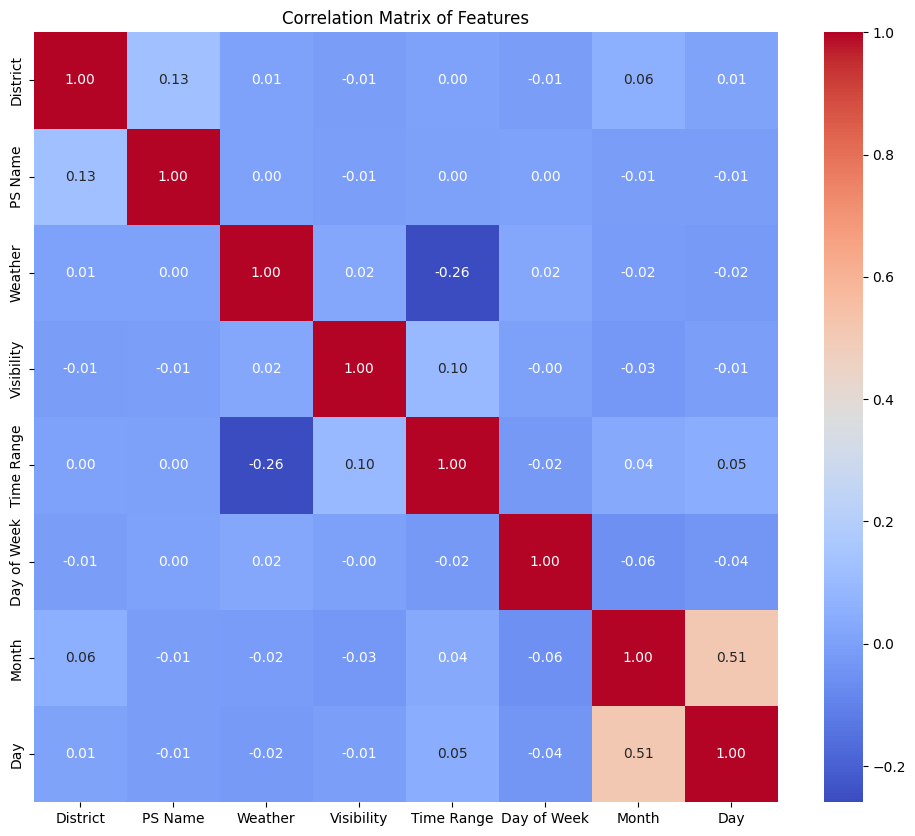

In [ ]:

# Assuming 'data' DataFrame is already created as in the previous code

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:

# Split the data into features (X) and target (y)
X = data.drop('Time Range', axis=1)
y = data['Time Range']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest


In [ ]:
 clf = RandomForestClassifier(n_estimators=300,random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)



Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       201
           1       0.88      0.89      0.89       209
           2       0.86      0.82      0.84      1335
           3       0.86      0.85      0.85      2101
           4       0.85      0.85      0.85      1885
           5       0.85      0.85      0.85      2033
           6       0.89      0.92      0.91      1599
           7       0.84      0.89      0.86       637

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.87     10000
weighted avg       0.86      0.86      0.86     10000



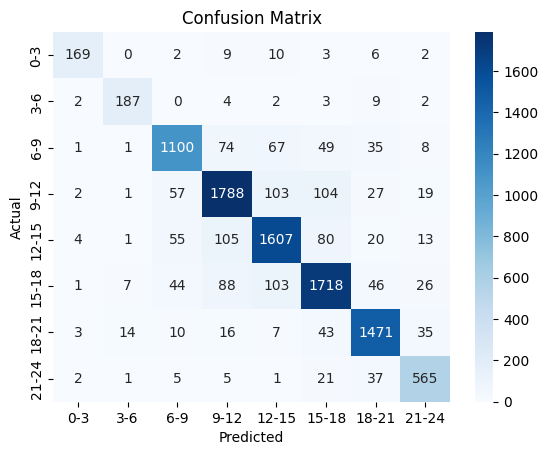


Feature Importances:
 PS Name        0.407716
District       0.202782
Day            0.155705
Weather        0.113760
Day of Week    0.079813
Month          0.024227
Visibility     0.015997
dtype: float64


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nFeature Importances:\n', feature_importances)

XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:28:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       201
           1       0.92      0.91      0.92       209
           2       0.90      0.87      0.88      1335
           3       0.89      0.91      0.90      2101
           4       0.90      0.89      0.89      1885
           5       0.90      0.89      0.90      2033
           6       0.92      0.93      0.93      1599
           7       0.86      0.93      0.90       637

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



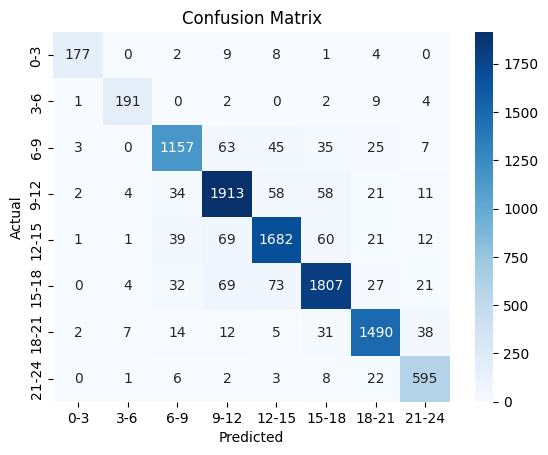


Feature Importances:
 Weather        0.368701
Visibility     0.136721
Month          0.109657
Day            0.102903
Day of Week    0.100022
PS Name        0.091376
District       0.090621
dtype: float32


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Train an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=200,learning_rate=1,random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nFeature Importances:\n', feature_importances)


In [ ]:
# prompt: save this xgboost model to drive

import joblib

# Save the trained XGBoost model to your Google Drive
joblib.dump(xgb_clf, '/content/drive/MyDrive/xgboost_model.pkl')

['/content/drive/MyDrive/xgboost_model.pkl']

LSTM


Encoded Features:
      District  PS Name  Weather  Visibility  Day of Week  Month
0           7       88        3           0            6      8
667        11      120        3           0            3      0
668         2      347        0           0            3      0
669        16       26        4           0            3     11
670        17      293        1           0            2      0
Encoded Labels: [0 1 2 3 4 5 6 7]
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.2587 - loss: 1.9256 - val_accuracy: 0.3513 - val_loss: 1.7114
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.3573 - loss: 1.6554 - val_accuracy: 0.3866 - val_loss: 1.5555
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.3823 - loss: 1.5386 - val_accuracy: 0.4087 - val_loss: 1.4791
Epoch 4/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.4066 - loss: 1.4747 - val_accuracy: 0.4089 - val_loss: 1.4437
Epoch 5/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.4117 - loss: 1.4381 - val_accuracy: 0.4127 - val_loss: 1.4173
Epoch 6/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4195 - loss: 1.4172 - val_accuracy: 0.4181 - val_loss: 1.4049
Epoch 7/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4183 - loss: 1.4049 - val_accuracy: 0.4243 - val_loss: 1.3889
Epoch 8/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.4220 - los

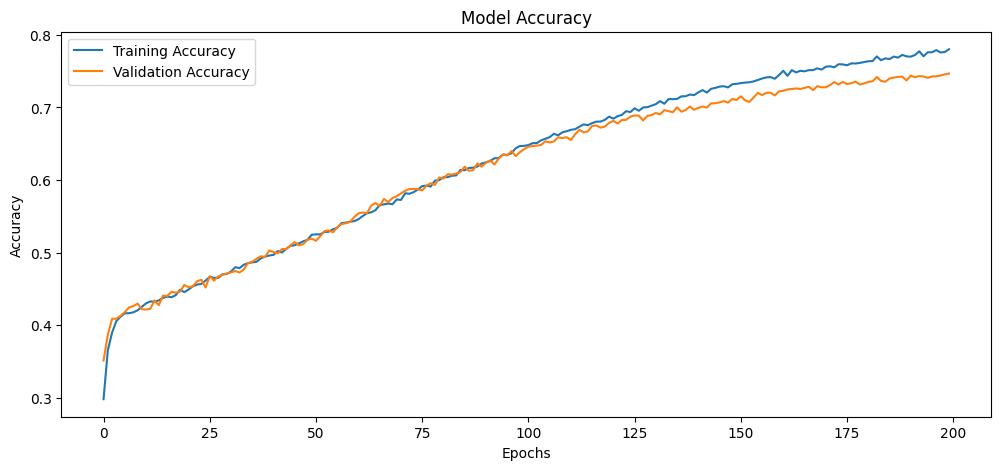

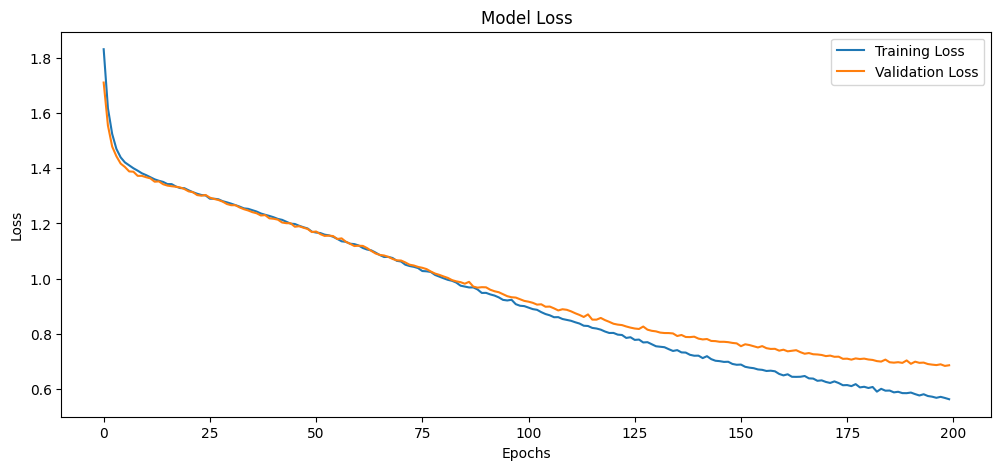

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into variables: X and y
# X: categorical feature set (all columns), y: target labels (categorical)

# Label Encoding of categorical data (both X and y)
X_encoded = X.apply(LabelEncoder().fit_transform)  # Convert each column to integers
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)  # Encode labels as integers
print("Encoded Features:\n", X_encoded.head())
print("Encoded Labels:", np.unique(y_encoded))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define parameters
num_classes = len(np.unique(y_encoded))  # Number of target classes
max_features = X_encoded.max().max() + 1  # Vocabulary size (max integer value in the dataset + 1)
input_length = X_encoded.shape[1]  # Number of features (sequence length)

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=input_length),  # Embedding layer
    LSTM(128, return_sequences=True),  # LSTM with sequence output
    Dropout(0.3),
    LSTM(64),  # LSTM with final output
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32
)

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Encoded Features:
      District  PS Name  Weather  Visibility  Day of Week  Month
0           7       88        3           0            6      8
667        11      120        3           0            3      0
668         2      347        0           0            3      0
669        16       26        4           0            3     11
670        17      293        1           0            2      0
Encoded Labels: [0 1 2 3 4 5 6 7]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 38ms/step - accuracy: 0.2457 - loss: 1.9270 - val_accuracy: 0.3379 - val_loss: 1.6811
Epoch 2/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 25ms/step - accuracy: 0.3505 - loss: 1.6514 - val_accuracy: 0.3926 - val_loss: 1.5393
Epoch 3/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.3917 - loss: 1.5291 - val_accuracy: 0.3979 - val_loss: 1.4866
Epoch 4/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4095 - loss: 1.4625 - val_accuracy: 0.3994 - val_loss: 1.4433
Epoch 5/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4100 - loss: 1.4406 - val_accuracy: 0.4171 - val_loss: 1.4188
Epoch 6/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.4220 - loss: 1.4159 - val_accuracy: 0.4119 - val_loss: 1.4055
Epoch 7/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4161 - loss: 1.3980 - val_accuracy: 0.4191 - val_loss: 1.3927
Epoch 8/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 

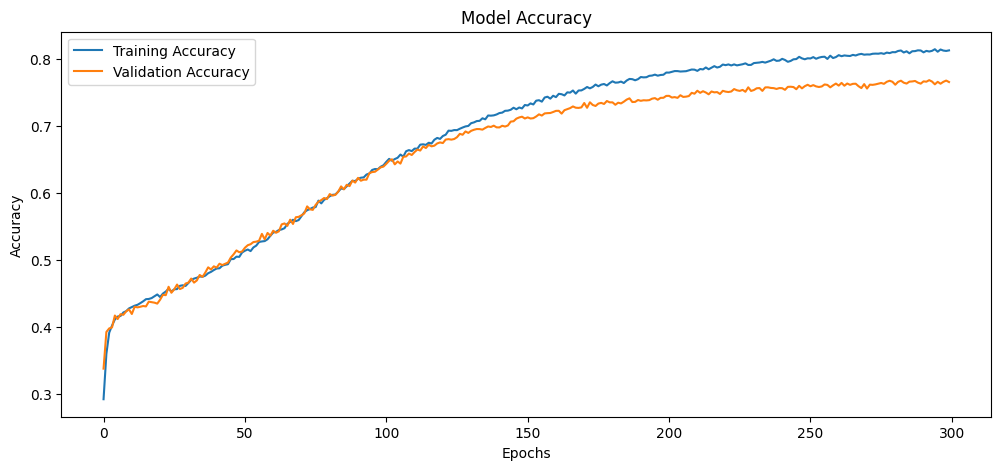

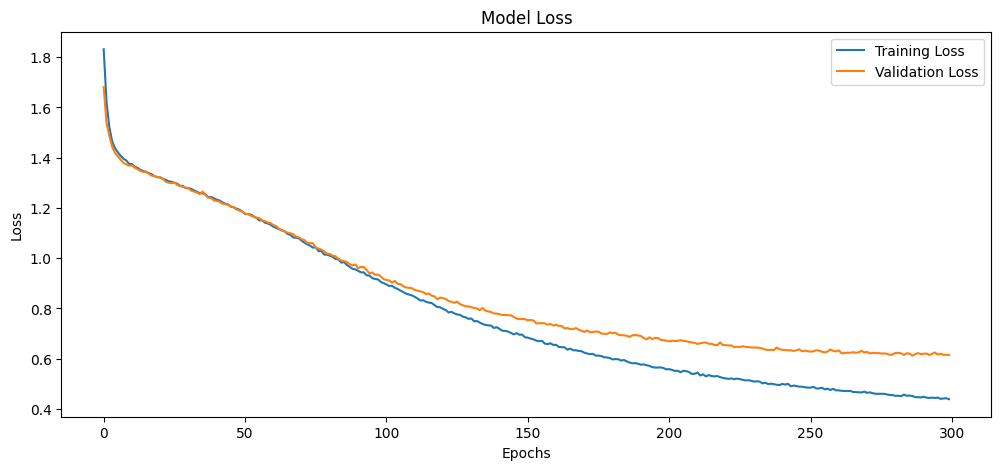

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into variables: X and y
# X: categorical feature set (all columns), y: target labels (categorical)

# Label Encoding of categorical data (both X and y)
X_encoded = X.apply(LabelEncoder().fit_transform)  # Convert each column to integers
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)  # Encode labels as integers
print("Encoded Features:\n", X_encoded.head())
print("Encoded Labels:", np.unique(y_encoded))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define parameters
num_classes = len(np.unique(y_encoded))  # Number of target classes
max_features = X_encoded.max().max() + 1  # Vocabulary size (max integer value in the dataset + 1)
input_length = X_encoded.shape[1]  # Number of features (sequence length)

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=input_length),  # Embedding layer
    LSTM(128, return_sequences=True),  # LSTM with sequence output
    Dropout(0.3),
    LSTM(64),  # LSTM with final output
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=32
)

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Save the model
lstm_model.save("/content/drive/MyDrive/lstm_model3.h5")
print("Model saved successfully!")


Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Encoded Features:
      District  PS Name  Weather  Visibility  Day of Week  Month
0           7       88        3           0            6      8
667        11      120        3           0            3      0
668         2      347        0           0            3      0
669        16       26        4           0            3     11
670        17      293        1           0            2      0
Encoded Labels: [0 1 2 3 4 5 6 7]
Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.3182 - loss: 1.7078 - val_accuracy: 0.3934 - val_loss: 1.4662
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.4017 - loss: 1.4544 - val_accuracy: 0.4149 - val_loss: 1.4023
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.4098 - loss: 1.4111 - val_accuracy: 0.4134 - val_loss: 1.3712
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.4236 - loss: 1.3800 - val_accuracy: 0.4306 - val_loss: 1.3530
Epoch 5/100
1250/1250 ━━━━━━━━━

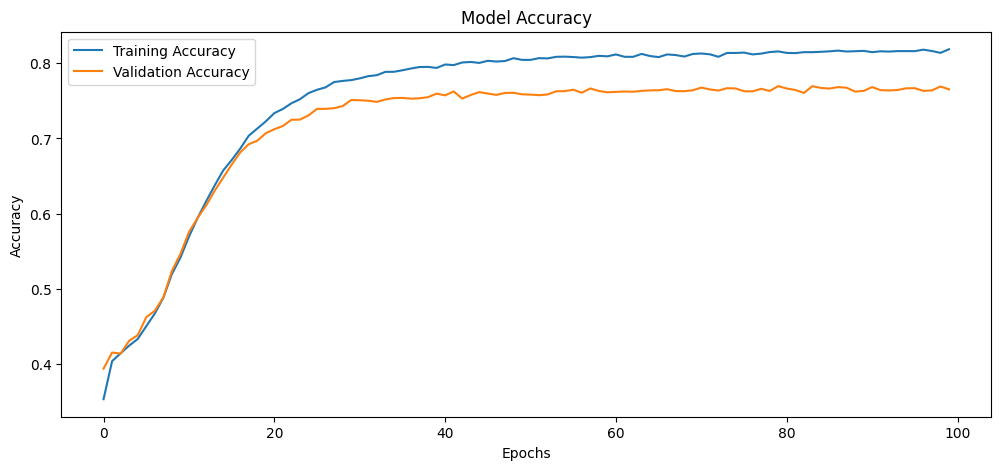

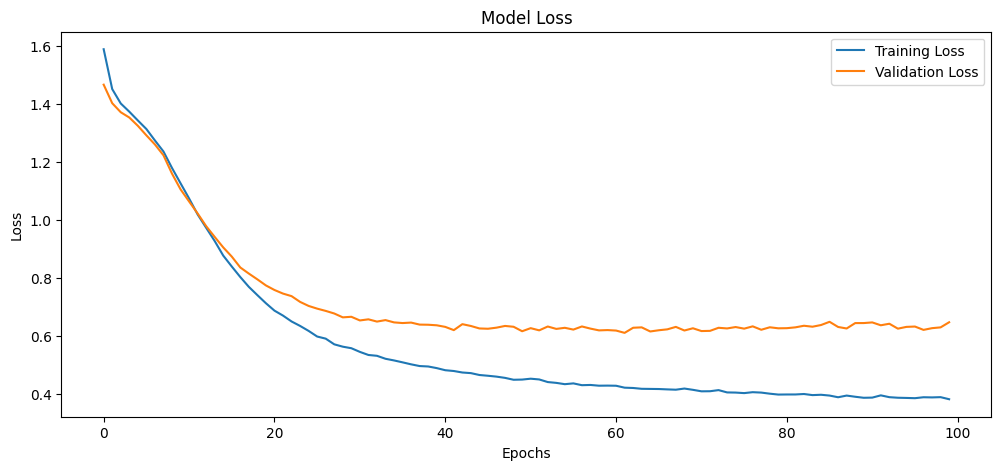

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into variables: X and y
# X: categorical feature set (all columns), y: target labels (categorical)

# Label Encoding of categorical data (both X and y)
X_encoded = X.apply(LabelEncoder().fit_transform)  # Convert each column to integers
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)  # Encode labels as integers
print("Encoded Features:\n", X_encoded.head())
print("Encoded Labels:", np.unique(y_encoded))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define parameters
num_classes = len(np.unique(y_encoded))  # Number of target classes
max_features = X_encoded.max().max() + 1  # Vocabulary size (max integer value in the dataset + 1)
input_length = X_encoded.shape[1]  # Number of features (sequence length)

# LSTM Model
lstm_model1 = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=input_length),  # Embedding layer
    LSTM(128, return_sequences=True),  # LSTM with sequence output
    Dropout(0.3),
    LSTM(64),  # LSTM with final output
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
lstm_model1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32
)

# Evaluate the model
loss, accuracy = lstm_model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Save the model
lstm_model1.save("/content/drive/MyDrive/lstm_model11.h5")
print("Model saved successfully!")

Model saved successfully!


Encoded Features:
      District  PS Name  Weather  Visibility  Day of Week  Month
0           7       88        3           0            6      8
667        11      120        3           0            3      0
668         2      347        0           0            3      0
669        16       26        4           0            3     11
670        17      293        1           0            2      0
Encoded Labels: [0 1 2 3 4 5 6 7]
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 62ms/step - accuracy: 0.3065 - loss: 1.7457 - val_accuracy: 0.3778 - val_loss: 1.4820
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.3987 - loss: 1.4523 - val_accuracy: 0.4149 - val_loss: 1.4005
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.4127 - loss: 1.4001 - val_accuracy: 0.4193 - val_loss: 1.3887
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4250 - loss: 1.3769 - val_accuracy: 0.4227 - val_loss: 1.3723
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.4327 - loss: 1.3516 - val_accuracy: 0.4345 - val_loss: 1.3479
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.4424 - loss: 1.3312 - val_accuracy: 0.4373 - val_loss: 1.3255
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.4520 - loss: 1.3068 - val_accuracy: 0.4429 - val_loss: 1.3082
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.4596 - loss: 1.2790 - val_

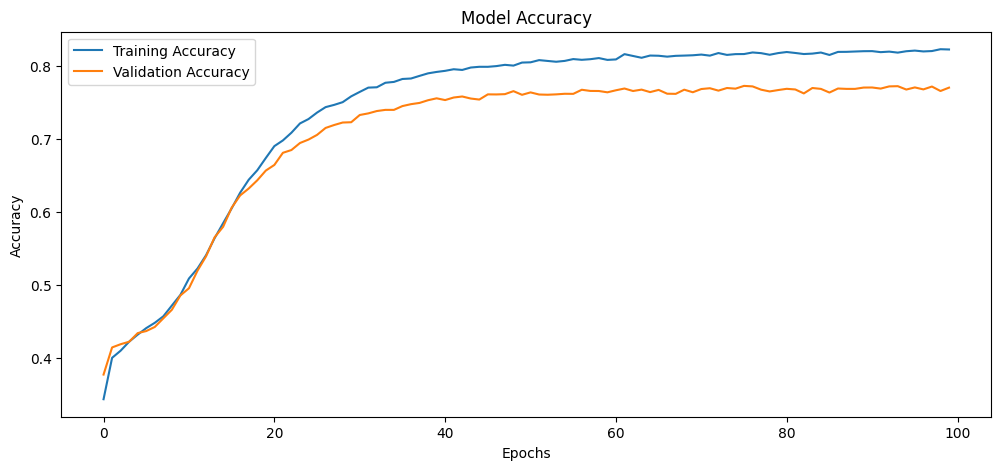

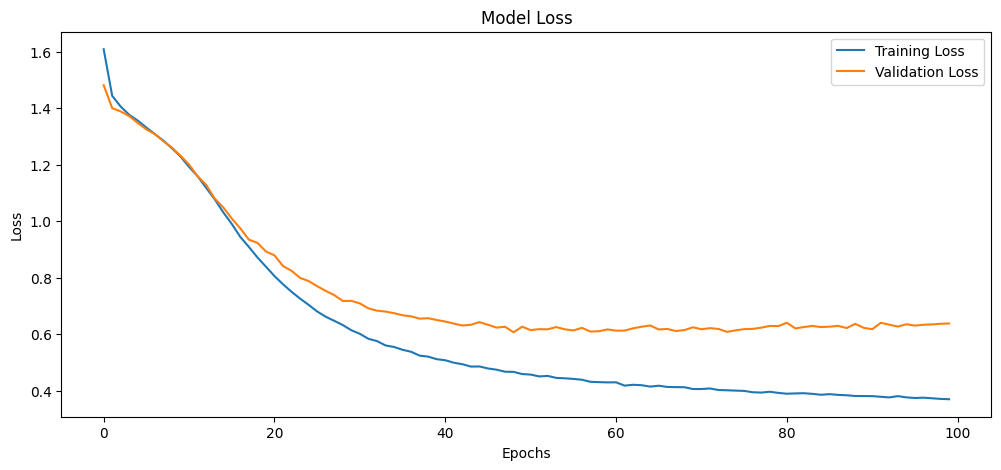

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into variables: X and y
# X: categorical feature set (all columns), y: target labels (categorical)

# Label Encoding of categorical data (both X and y)
X_encoded = X.apply(LabelEncoder().fit_transform)  # Convert each column to integers
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)  # Encode labels as integers
print("Encoded Features:\n", X_encoded.head())
print("Encoded Labels:", np.unique(y_encoded))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define parameters
num_classes = len(np.unique(y_encoded))  # Number of target classes
max_features = X_encoded.max().max() + 1  # Vocabulary size (max integer value in the dataset + 1)
input_length = X_encoded.shape[1]  # Number of features (sequence length)

# LSTM Model
lstm_model1 = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=input_length),  # Embedding layer
    LSTM(128, return_sequences=True),  # LSTM with sequence output
    Dropout(0.3),
    LSTM(64),  # LSTM with final output
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
lstm_model1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64
)

# Evaluate the model
loss, accuracy = lstm_model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

# Save the model
lstm_model1.save("/content/drive/MyDrive/lstm_model12.h5")
print("Model saved successfully!")

Model saved successfully!


BiLSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Dense, Dropout, BatchNormalization,
    LeakyReLU, Bidirectional, Attention, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ensure target_names are strings
target_names = list(map(str, time_ranges))  # Convert time_ranges to strings if not already

# Preprocess dataset (adjust based on your dataset's structure)
X = data.drop(columns=['Time Range'])  # Replace 'target' with your target column name
y = data['Time Range']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

time_ranges = label_encoder.classes_  # Save the class names for confusion matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features using embeddings-compatible method
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
encoded_columns = {}

for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    encoded_columns[col] = le

# Convert data to numpy arrays for Keras
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Parameters for model
max_features = np.max(X_train) + 1  # Total number of unique values in data
input_length = X_train.shape[1]  # Number of features per sample
num_classes = len(np.unique(y))  # Number of target classes

# Build Bidirectional LSTM with Attention model
input_layer = Input(shape=(input_length,))
x = Embedding(input_dim=max_features, output_dim=256, input_length=input_length)(input_layer)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = LSTM(64, return_sequences=True)(x)
x = Attention()([x, x])  # Add attention
x = Flatten()(x)  # Flatten the output of the attention layer
x = Dropout(0.4)(x)
x = Dense(64)(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 72ms/step - accuracy: 0.3159 - loss: 1.7056 - val_accuracy: 0.4028 - val_loss: 1.4337
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.4133 - loss: 1.4090 - val_accuracy: 0.4136 - val_loss: 1.3833
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.4353 - loss: 1.3435 - val_accuracy: 0.4159 - val_loss: 1.3668
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 67ms/step - accuracy: 0.4413 - loss: 1.3142 - val_accuracy: 0.4424 - val_loss: 1.2987
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 70ms/step - accuracy: 0.4571 - loss: 1.2724 - val_accuracy: 0.4551 - val_loss: 1.2798
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.4916 - loss: 1.2087 - val_accuracy: 0.5018 - val_loss: 1.2013
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 74ms/step - accuracy: 0.5204 - loss: 1.1447 - val_accuracy: 0.5295 - val_loss: 1.1449
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 68ms/step - accuracy: 0.5635 - loss: 1.0582 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step
Classification Report:
               precision    recall  f1-score   support

         0-3       0.81      0.73      0.77       201
         3-6       0.80      0.76      0.78       209
         6-9       0.76      0.66      0.71      1335
        9-12       0.74      0.81      0.77      2101
       12-15       0.77      0.76      0.77      1885
       15-18       0.78      0.75      0.76      2033
       18-21       0.81      0.85      0.83      1599
       21-24       0.74      0.77      0.75       637

    accuracy                           0.77     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.77      0.77      0.77     10000



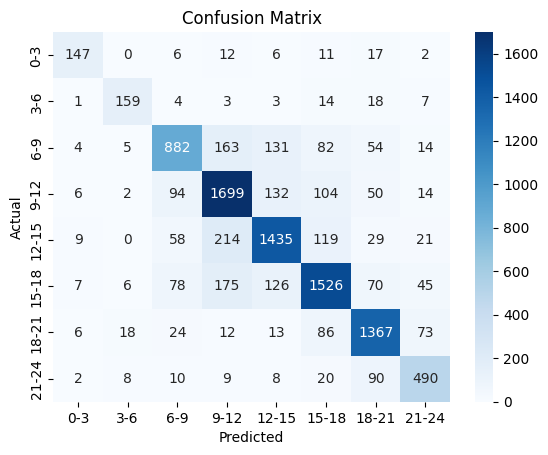

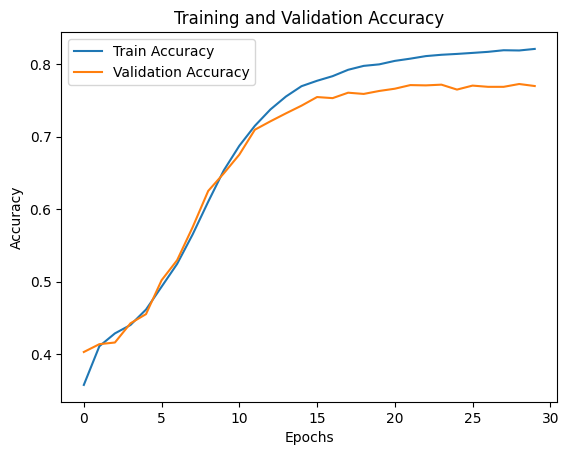

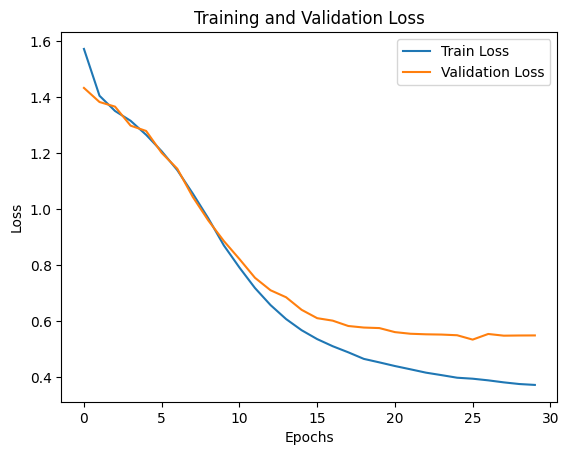

In [ ]:


# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the model
model.save("/content/drive/MyDrive/bilstm_model2.keras")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Dense, Dropout, BatchNormalization,
    LeakyReLU, Bidirectional, Attention, Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ensure target_names are strings
target_names = list(map(str, time_ranges))  # Convert time_ranges to strings if not already

# Preprocess dataset (adjust based on your dataset's structure)
X = data.drop(columns=['Time Range'])  # Replace 'target' with your target column name
y = data['Time Range']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

time_ranges = label_encoder.classes_  # Save the class names for confusion matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features using embeddings-compatible method
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
encoded_columns = {}

for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    encoded_columns[col] = le

# Convert data to numpy arrays for Keras
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Parameters for model
max_features = np.max(X_train) + 1  # Total number of unique values in data
input_length = X_train.shape[1]  # Number of features per sample
num_classes = len(np.unique(y))  # Number of target classes

# Build Bidirectional LSTM with Attention model
input_layer = Input(shape=(input_length,))
x = Embedding(input_dim=max_features, output_dim=256, input_length=input_length)(input_layer)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = LSTM(64, return_sequences=True)(x)
x = Attention()([x, x])  # Add attention
x = Flatten()(x)  # Flatten the output of the attention layer
x = Dropout(0.4)(x)
x = Dense(64)(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 94s 66ms/step - accuracy: 0.3161 - loss: 1.6984 - val_accuracy: 0.4044 - val_loss: 1.4331
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 59ms/step - accuracy: 0.4089 - loss: 1.4204 - val_accuracy: 0.4012 - val_loss: 1.4008
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.4261 - loss: 1.3590 - val_accuracy: 0.4285 - val_loss: 1.3491
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.4431 - loss: 1.3154 - val_accuracy: 0.4502 - val_loss: 1.3076
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.4737 - loss: 1.2480 - val_accuracy: 0.4798 - val_loss: 1.2395
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.5075 - loss: 1.1795 - val_accuracy: 0.5294 - val_loss: 1.1396
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.5603 - loss: 1.0738 - val_accuracy: 0.5823 - val_loss: 1.0291
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.6220 

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       201
           1       0.77      0.76      0.76       209
           2       0.72      0.71      0.72      1335
           3       0.75      0.81      0.78      2101
           4       0.76      0.76      0.76      1885
           5       0.78      0.73      0.76      2033
           6       0.82      0.83      0.83      1599
           7       0.73      0.78      0.75       637

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.77      0.77      0.77     10000



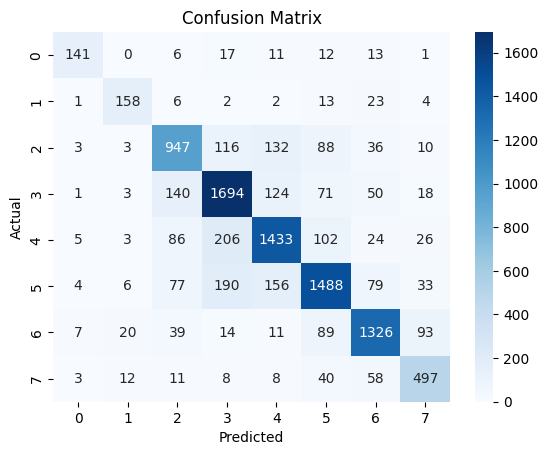

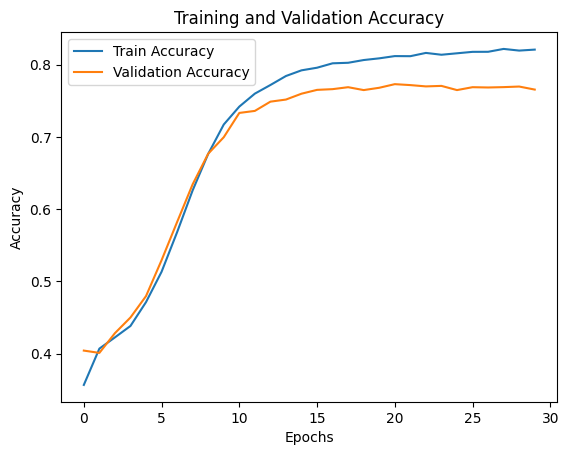

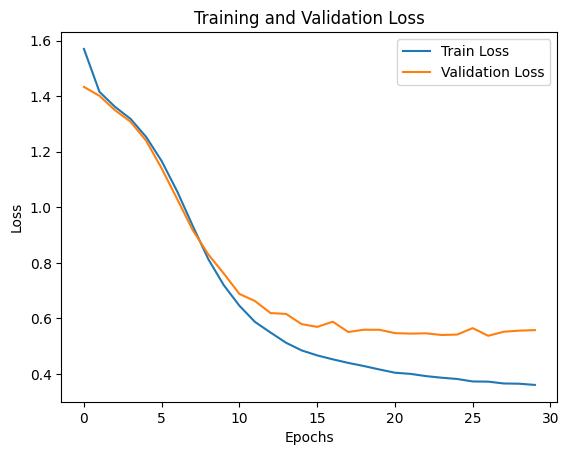

In [ ]:


# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the model
model.save("/content/drive/MyDrive/bilstm_model3.keras")
print("Model saved successfully!")

Model saved successfully!


Decision Tree

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       201
           1       0.84      0.90      0.87       209
           2       0.82      0.82      0.82      1335
           3       0.84      0.84      0.84      2101
           4       0.85      0.84      0.85      1885
           5       0.85      0.83      0.84      2033
           6       0.90      0.91      0.90      1599
           7       0.85      0.89      0.87       637

    accuracy                           0.85     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.85      0.85     10000



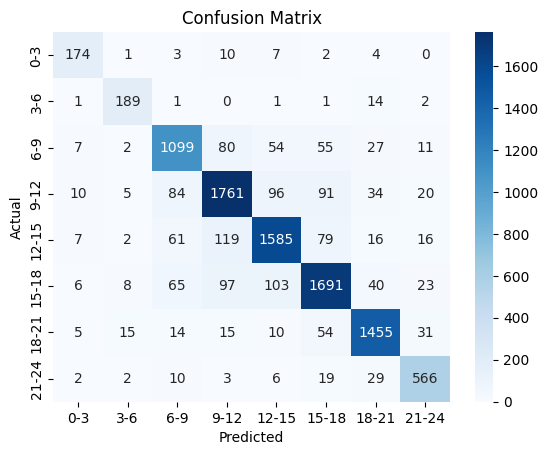


Feature Importance:
     Feature  Importance
1  Feature 2    0.317391
6  Feature 7    0.223715
0  Feature 1    0.163693
4  Feature 5    0.132079
2  Feature 3    0.097107
5  Feature 6    0.041227
3  Feature 4    0.024788


<ipython-input-72-d910b22168fa>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


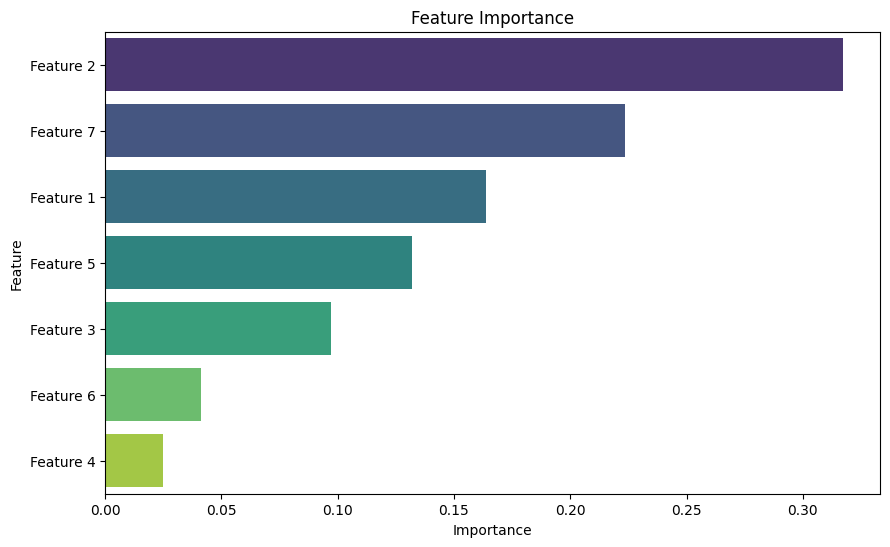

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print feature importance
feature_importance = dt_model.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

HyperParameter Tuning - XGB

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.2f}')

# Train the model using the best hyperparameters
best_xgb_clf = grid_search.best_estimator_
best_xgb_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest Accuracy with Best Hyperparameters: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix for best model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance of the best model
feature_importances = pd.Series(best_xgb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nFeature Importances:\n', feature_importances)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


KeyboardInterrupt: 

CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Split the data into features (X) and target (y)
X = data.drop('Time Range', axis=1)
y = data['Time Range']

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoostClassifier
cat_clf = CatBoostClassifier(
    iterations=500,  # Number of boosting rounds
    learning_rate=0.1,  # Step size
    depth=8,  # Maximum tree depth
    cat_features=categorical_features,  # Categorical features
    verbose=100,  # Verbose output every 100 iterations
    random_seed=42
)

# Train the model
cat_clf.fit(X_train, y_train)

# Make predictions
y_pred = cat_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))



0:	learn: 1.9872497	total: 3.9s	remaining: 32m 25s
100:	learn: 0.8436961	total: 3m 45s	remaining: 14m 52s
200:	learn: 0.7705234	total: 7m 57s	remaining: 11m 50s
300:	learn: 0.7195848	total: 12m 11s	remaining: 8m 3s
400:	learn: 0.6500456	total: 16m 15s	remaining: 4m
499:	learn: 0.5955834	total: 20m 11s	remaining: 0us
Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

         0-3       0.80      0.76      0.78       201
       12-15       0.75      0.81      0.78      1885
       15-18       0.78      0.75      0.77      2033
       18-21       0.80      0.85      0.82      1599
       21-24       0.75      0.71      0.73       637
         3-6       0.77      0.67      0.72       209
         6-9       0.78      0.63      0.70      1335
        9-12       0.76      0.81      0.79      2101

    accuracy                           0.77     10000
   macro avg       0.77      0.75      0.76     10000
weighted avg       0.77      0.77      0.77   

NameError: name 'time_ranges' is not defined

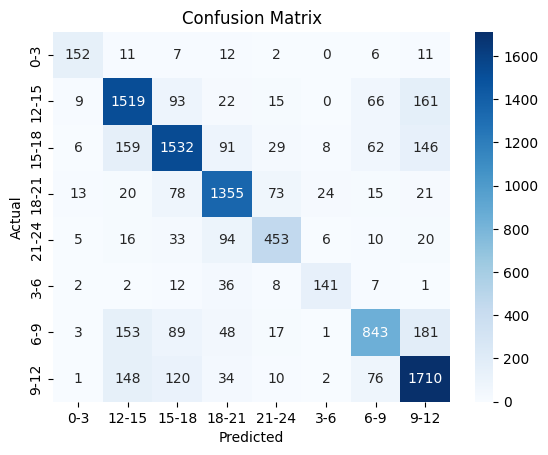


Feature Importances:
 PS Name            27.348559
Day of Week        22.853855
Weather            22.241752
Traffic Control     9.098737
District            7.027640
Visibility          6.454511
Month               4.974946
dtype: float64


In [ ]:
# Extract unique class labels (time ranges)
time_ranges = sorted(y.unique())

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=time_ranges, yticklabels=time_ranges)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature importance
feature_importances = pd.Series(cat_clf.get_feature_importance(), index=X.columns).sort_values(ascending=False)
print('\nFeature Importances:\n', feature_importances)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Step 1: Load Saved Models
lstm_model = load_model('/content/drive/MyDrive/lstm_model12.h5')         # Load LSTM model
bilstm_model = load_model('/content/drive/MyDrive/bilstm_model1.h5')     # Load BiLSTM model
xgb_model = joblib.load('/content/drive/MyDrive/xgboost_model.pkl')         # Load XGBoost model



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure correct input shapes for models
# Assuming LSTM expects a 3D shape (samples, timesteps, features)
num_features = 3  # Set the number of features per timestep for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1] // num_features, num_features))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1] // num_features, num_features))
X_train_xgb = X_train.values  # XGBoost uses 2D input
X_test_xgb = X_test.values

# Step 3: Generate Predictions on Train Data
lstm_train_predictions = lstm_model.predict(X_train_lstm).flatten()  # LSTM predictions
bilstm_train_predictions = bilstm_model.predict(X_train_lstm).flatten()  # BiLSTM predictions
xgb_train_predictions = xgb_model.predict_proba(X_train_xgb)[:, 1]  # XGBoost probabilities

# Combine Train Predictions into Meta-features
meta_train_features = np.column_stack((lstm_train_predictions, bilstm_train_predictions, xgb_train_predictions))

# Step 4: Train Meta-model
meta_model = LogisticRegression()  # Logistic Regression as the meta-model
meta_model.fit(meta_train_features, y_train)

# Step 5: Generate Predictions on Test Data
lstm_test_predictions = lstm_model.predict(X_test_lstm).flatten()  # LSTM predictions
bilstm_test_predictions = bilstm_model.predict(X_test_lstm).flatten()  # BiLSTM predictions
xgb_test_predictions = xgb_model.predict_proba(X_test_xgb)[:, 1]  # XGBoost probabilities

# Combine Test Predictions into Meta-features
meta_test_features = np.column_stack((lstm_test_predictions, bilstm_test_predictions, xgb_test_predictions))

# Step 6: Make Final Predictions on Test Data
final_predictions = meta_model.predict(meta_test_features)

# Step 7: Evaluate Stacked Model
accuracy = accuracy_score(y_test, final_predictions)
print(f"Stacked Model Accuracy on Test Data: {accuracy}")


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(32, 2, 3), dtype=float32). Expected shape (64, 6), but input has incompatible shape (32, 2, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 2, 3), dtype=int64)
  • training=False
  • mask=None